### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Import Data

In [2]:
preprocessed_ldata_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Explore Data

In [3]:
loan_data_preprocessed = preprocessed_ldata_backup.copy()

LGD: the percentage of the exposure that was lost after the borrower defaulted <br/>
EAD: the amount of the exposure at the moment the borrower defaulted <br/><br/>
It is good practice to build models with data from borrowers that have had enought time to repay part of the remaining debt. <br/>
Which refers borrowers with 'loan_status' as 'Charged Off' or 'Does not meet the credit policy. Status:Charged Off'.

In [4]:
loan_data_preprocessed['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [5]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off', 
                                                                                        'Does not meet the credit policy. Status:Charged Off'])]

In [6]:
loan_data_defaults.shape

(43236, 207)

In [27]:
loan_data_defaults.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
initial_list_status:f    0
initial_list_status:w    0
recovery_rate            0
CCF                      0
recovery_rate_0_1        0
Length: 210, dtype: int64

### Independent Variables

In [8]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Dependent Variables

In [10]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [12]:
loan_data_defaults['recovery_rate'] = np.where((loan_data_defaults['recovery_rate'] > 1), 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where((loan_data_defaults['recovery_rate'] < 0), 0, loan_data_defaults['recovery_rate'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

EAD: total funded amount x credit conversion factor

In [14]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [16]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

### Explore Dependent Variables

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([2.0651e+04, 3.7200e+02, 6.4200e+02, 1.1950e+03, 1.9300e+03,
        1.9430e+03, 6.4500e+02, 7.4900e+02, 8.9700e+02, 1.2360e+03,
        1.5530e+03, 1.7910e+03, 2.3140e+03, 2.4510e+03, 1.0410e+03,
        6.7200e+02, 7.0600e+02, 4.7300e+02, 1.9600e+02, 2.1000e+02,
        1.8600e+02, 1.5500e+02, 1.5900e+02, 1.1500e+02, 5.6000e+01,
        6.1000e+01, 4.2000e+01, 5.1000e+01, 4.6000e+01, 3.5000e+01,
        4.0000e+01, 3.3000e+01, 2.9000e+01, 2.5000e+01, 3.2000e+01,
        4.0000e+01, 2.7000e+01, 3.0000e+01, 1.6000e+01, 1.4000e+01,
        2.7000e+01, 2.0000e+01, 1.7000e+01, 1.0000e+01, 6.0000e+00,
        1.1000e+01, 5.0000e+00, 1.0000e+01, 1.1000e+01, 9.0000e+00,
        1.2000e+01, 1.1000e+01, 9.0000e+00, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 8.0000e+00, 2.0000e+00, 5.0000e+00,
        3.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00,
        3.0000e+00, 6.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 2.00

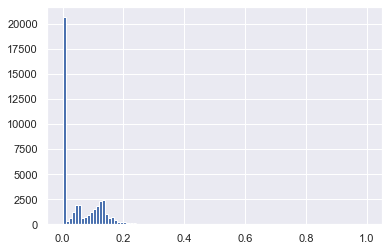

In [18]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 100)

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

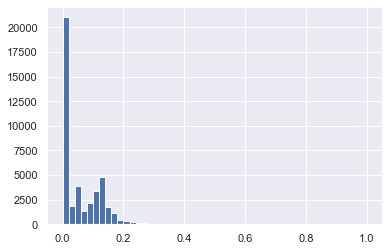

In [19]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

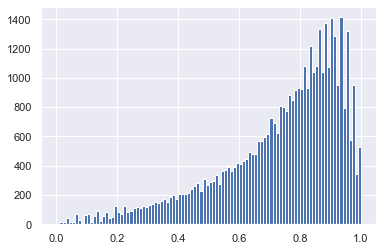

In [20]:
plt.hist(loan_data_defaults['CCF'], bins = 100)

Two variables are proportions constrained between 0 and 1. Methodologically, the density of proportions is best descirbed as a specific distribution called beta distribution. 

In [21]:
loan_data_defaults['recovery_rate_0_1'] = np.where((loan_data_defaults['recovery_rate'] == 0), 0, 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
loan_data_defaults['recovery_rate_0_1']

1         1
8         1
9         1
12        1
14        1
         ..
466254    0
466256    0
466276    1
466277    0
466281    0
Name: recovery_rate_0_1, Length: 43236, dtype: int64

## LGD Model
### Splitting Data

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
# removed 'good_bad' from list of drop columns because it wasn't there. deal with it later.
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

### Preparing the inputs

In [28]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'months_since_issue_d',
'months_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [29]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [30]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [31]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [32]:
lgd_inputs_stage_1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

### Estimating the Model

In [33]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [34]:
reg_lgd_st1 = LogisticRegression_with_p_values()
reg_lgd_st1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [35]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [37]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.000465,NaN
1,grade:A,-0.000027,9.997370e-01
2,grade:B,-0.000023,9.997165e-01
3,grade:C,-0.000008,9.999047e-01
4,grade:D,0.000230,9.973013e-01
5,grade:E,0.000095,9.990008e-01
6,grade:F,0.000171,9.984486e-01
7,home_ownership:MORTGAGE,-0.000015,9.995350e-01
8,home_ownership:NONE,0.000001,9.999989e-01
9,home_ownership:OTHER,0.000003,9.999927e-01


### Testing the model

In [38]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [40]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis = 1)

KeyError: "['grade:G' 'home_ownership:RENT' 'verification_status:Verified'\n 'purpose:credit_card' 'initial_list_status:f'] not found in axis"

In [42]:
y_hat_test_lgd_stage_1 = reg_lgd_st1.model.predict(lgd_inputs_stage_1_test)

In [43]:
y_hat_test_lgd_stage_1

array([1, 0, 1, ..., 0, 1, 0])

In [44]:
y_hat_test_proba_lgd_st1 = reg_lgd_st1.model.predict_proba(lgd_inputs_stage_1_test)

In [45]:
y_hat_test_proba_lgd_st1

array([[0.20623598, 0.79376402],
       [0.59958839, 0.40041161],
       [0.42688291, 0.57311709],
       ...,
       [0.55975981, 0.44024019],
       [0.19923906, 0.80076094],
       [0.52571154, 0.47428846]])

In [46]:
y_hat_test_proba_lgd_st1 = y_hat_test_proba_lgd_st1[:][:, 1]

In [47]:
y_hat_test_proba_lgd_st1

array([0.79376402, 0.40041161, 0.57311709, ..., 0.44024019, 0.80076094,
       0.47428846])

In [48]:
lgd_targets_st1_test_temp = lgd_targets_stage_1_test

In [53]:
lgd_targets_st1_test_temp

0       1
1       1
2       0
3       1
4       0
       ..
8643    1
8644    0
8645    1
8646    1
8647    0
Name: recovery_rate_0_1, Length: 8648, dtype: int64

In [49]:
lgd_targets_st1_test_temp.reset_index(drop = True, inplace = True)

In [55]:
df_pred_prob = pd.concat([lgd_targets_st1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_st1)], axis = 1)

In [56]:
df_pred_prob

,recovery_rate_0_1,0
0,1,0.793764
1,1,0.400412
2,0,0.573117
3,1,0.399096
4,0,0.502604
...,...,...
8643,1,0.422423
8644,0,0.695799
8645,1,0.440240
8646,1,0.800761


In [57]:
df_pred_prob.columns = ['lgd_targets_test_st1', 'y_hat_test_proba_lgd_st1']

In [58]:
df_pred_prob.index = lgd_inputs_stage_1_test.index

In [59]:
df_pred_prob.head()

,lgd_targets_test_st1,y_hat_test_proba_lgd_st1
178928,1,0.793764
69814,1,0.400412
101396,0,0.573117
463268,1,0.399096
253729,0,0.502604


### Estimating the Accuracy of the Model

In [60]:
threshold = 0.5
df_pred_prob['y_hat_test_lgd_st1'] = np.where(df_pred_prob['y_hat_test_proba_lgd_st1'] > threshold, 1, 0)

In [63]:
pd.crosstab(df_pred_prob['lgd_targets_test_st1'], df_pred_prob['y_hat_test_lgd_st1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,2247,1515
1,1888,2998


In [66]:
pd.crosstab(df_pred_prob['lgd_targets_test_st1'], df_pred_prob['y_hat_test_lgd_st1'], rownames = ['Actual'], colnames = ['Predicted']) / df_pred_prob.shape[0]

Predicted,0,1
Actual,,
0,0.259829,0.175185
1,0.218316,0.346670


In [67]:
(pd.crosstab(df_pred_prob['lgd_targets_test_st1'], df_pred_prob['y_hat_test_lgd_st1'], rownames = ['Actual'], colnames = ['Predicted']) / df_pred_prob.shape[0]).iloc[0, 0] + (pd.crosstab(df_pred_prob['lgd_targets_test_st1'], df_pred_prob['y_hat_test_lgd_st1'], rownames = ['Actual'], colnames = ['Predicted']) / df_pred_prob.shape[0]).iloc[1, 1]

0.6064986123959297

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
false_pos_rt, true_pos_rt, thresholds = roc_curve(df_pred_prob['lgd_targets_test_st1'], df_pred_prob['y_hat_test_proba_lgd_st1'])

Text(0.5, 1.0, 'ROC curve')

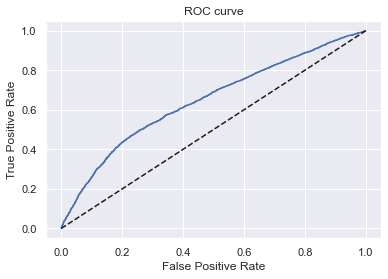

In [70]:
plt.plot(false_pos_rt, true_pos_rt)
plt.plot(false_pos_rt, false_pos_rt, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

In [71]:
auroc = roc_auc_score(df_pred_prob['lgd_targets_test_st1'], df_pred_prob['y_hat_test_proba_lgd_st1'])
auroc

0.6471004070913587

### Saving the Model

In [72]:
import pickle

In [73]:
pickle.dump(reg_lgd_st1, open('lgd_model_stage_1.sav', 'wb'))

### Stage 2: Linear Regression
to determine the exact recovery rate of observations that are predicted to be above zero

In [74]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [77]:
lgd_inputs_st2_train, lgd_inputs_st2_test, lgd_targets_st2_train, lgd_targets_st2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [78]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = 'positive'

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [80]:
lgd_inputs_st2_train = lgd_inputs_st2_train[features_all]

In [81]:
lgd_inputs_st2_train = lgd_inputs_st2_train.drop(features_reference_cat, axis = 1)

In [85]:
reg_lgd_st2 = LinearRegression()

In [86]:
reg_lgd_st2.fit(lgd_inputs_st2_train, lgd_targets_st2_train)

LinearRegression()

In [87]:
feature_name = lgd_inputs_st2_train.columns.values

In [91]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.291338e-02,NaN
1,grade:A,2.396517e-02,1.828709e-07
2,grade:B,1.941194e-02,1.225697e-07
3,grade:C,1.486763e-02,3.059776e-05
4,grade:D,1.077519e-02,3.893417e-03
5,grade:E,9.848648e-03,1.741445e-02
6,grade:F,3.123212e-03,5.102721e-01
7,home_ownership:MORTGAGE,2.289659e-03,1.284894e-01
8,home_ownership:NONE,1.559875e-01,2.787276e-05
9,home_ownership:OTHER,0.000000e+00,1.000000e+00


The coefficient shows the change in the dependent variable that is going to occur as a result of a unit change in the respective independent variable.<br/>
E.g.,  if the purpose of the loan is educational, it is expected that the recovery rate would be 7.63% higher.

### Stage 2 - Linear Regression Evaluation

In [92]:
lgd_inputs_st2_test = lgd_inputs_st2_test[features_all]

In [93]:
lgd_inputs_st2_test = lgd_inputs_st2_test.drop(features_reference_cat, axis = 1)

In [94]:
lgd_inputs_st2_test.columns.values

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:w', 'term_int', 'emp_length_int',
       'months_since_issue_d', 'months_since_earliest_cr_line',
       'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'total_acc',
       'acc_now_delinq', 'total_rev_hi_lim'], dtype=object)

In [95]:
y_hat_test_lgd_st2 = reg_lgd_st2.predict(lgd_inputs_st2_test)

In [96]:
# using the correlation between actual and predicted values as a proxy of model performance
lgd_targets_st2_test_temp = lgd_targets_st2_test

In [97]:
lgd_targets_st2_test_temp = lgd_targets_st2_test_temp.reset_index(drop = True)

In [98]:
pd.concat([lgd_targets_st2_test_temp, pd.DataFrame(y_hat_test_lgd_st2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.303822
0,0.303822,1.000000


weak to positive correlation in general but satisfactory for an LGD model

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recovery_rate', ylabel='Density'>

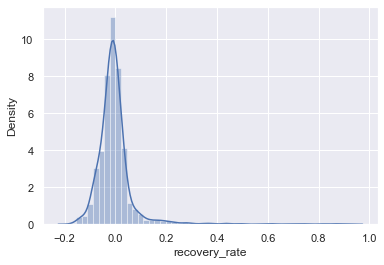

In [99]:
# plotting the residuals
sns.distplot(lgd_targets_st2_test - y_hat_test_lgd_st2)

In [100]:
pickle.dump(reg_lgd_st2, open('lgd_model_stage_2.sav', 'wb'))

### Combining Stage 1 and Stage 2

In [101]:
y_hat_test_lgd_st2_all = reg_lgd_st2.predict(lgd_inputs_stage_1_test)

In [102]:
y_hat_test_lgd_st2_all

array([0.0849639 , 0.09991941, 0.14136151, ..., 0.13393593, 0.09172827,
       0.14445079])

In [103]:
# combine predicetd values of stage 1 and stage 2 by multiplying them.
y_hat_test_lgd = y_hat_test_lgd_st2_all * y_hat_test_lgd_stage_1

In [104]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.052920
std,0.055684
min,0.000000
25%,0.000000
50%,0.060294
75%,0.091438
max,0.225531


In [105]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

## EAD Model
The dependent variable for the EAD model is the Credit Conversion Factor (CCF): the proportion from the original amount of the loan that is still outstanding at the moment when the borrower defaulted.
### Estimation and Interpretation

In [106]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate', 'recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 42)

In [107]:
ead_inputs_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [108]:
ead_inputs_train = ead_inputs_train[features_all]

In [109]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis = 1)

In [110]:
reg_ead = LinearRegression()

In [111]:
reg_ead.fit(ead_inputs_train, ead_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression()

In [112]:
feature_name = ead_inputs_train.columns.values

In [113]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.935369e-01,NaN
1,grade:A,0.000000e+00,1.000000e+00
2,grade:B,0.000000e+00,1.000000e+00
3,grade:C,1.503876e-02,5.042917e-03
4,grade:D,2.365103e-02,2.679780e-05
5,grade:E,3.105645e-02,7.408531e-07
6,grade:F,3.230637e-02,8.695755e-06
7,home_ownership:MORTGAGE,0.000000e+00,1.000000e+00
8,home_ownership:NONE,2.231756e-02,7.361500e-01
9,home_ownership:OTHER,0.000000e+00,1.000000e+00


positive coefficients = increase in the CCF (higher risk)<br/>
negative coefficients = decrease in the CCF (lower risk)<br/>
E.g., borrower with external credit rating grade E, their CCF is expected to be 3% higher than the CCF for grade G.

### Model Validation

In [114]:
ead_inputs_test = ead_inputs_test[features_all]

In [115]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis = 1)

In [116]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [117]:
ead_targets_test_temp = ead_targets_test

In [118]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop = True)

In [120]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,CCF,0
CCF,1.000000,0.495461
0,0.495461,1.000000


moderately strong positive correlation which is good for an ead model

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CCF', ylabel='Density'>

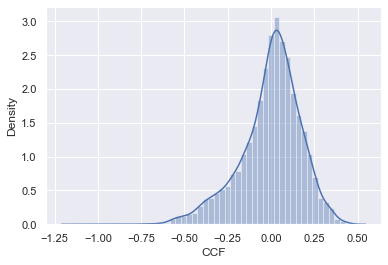

In [121]:
# distribution of the residuals
sns.distplot(ead_targets_test - y_hat_test_ead)

In [122]:
# descriptive factors of the predicted values of the credit conversion factor
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736976
std,0.098486
min,0.518114
25%,0.675007
50%,0.730412
75%,0.802800
max,1.272062


In [123]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [124]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736945
std,0.098358
min,0.518114
25%,0.675007
50%,0.730412
75%,0.802800
max,1.000000


### Expected Loss

In [125]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,0,1,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,0,1,0


In [126]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [127]:
loan_data_prepro_lgd_ead = loan_data_preprocessed[features_all]

In [128]:
loan_data_prepro_lgd_ead = loan_data_prepro_lgd_ead.drop(features_reference_cat, axis = 1)

In [129]:
# lgd = 1- recovery rate
loan_data_preprocessed['recovery_rate_st1'] = reg_lgd_st1.model.predict(loan_data_prepro_lgd_ead)

In [131]:
loan_data_preprocessed['recovery_rate_st2'] = reg_lgd_st2.predict(loan_data_prepro_lgd_ead)

In [132]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st1'] * loan_data_preprocessed['recovery_rate_st2']

In [133]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [134]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [135]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.962261
std           0.053698
min           0.590824
25%           0.922245
50%           1.000000
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

Calculating EAD <br/>
Modelling the ccf: proportion of the original amount of the loan that is still outstanding when the borrower defaults

In [136]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_prepro_lgd_ead)

In [137]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [138]:
# EAD = CCF * Funded Amount
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed['funded_amnt']

In [139]:
loan_data_preprocessed['EAD'].describe()

count    466285.000000
mean      10682.292960
std        6837.811079
min         303.334118
25%        5430.960558
50%        9059.202341
75%       14530.400466
max       35000.000000
Name: EAD, dtype: float64

In [140]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,recovery_rate_st1,recovery_rate_st2,recovery_rate,LGD,CCF,EAD
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,1,0,1,0.066041,0.066041,0.933959,0.561264,2806.320003
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,1,0,1,0.069724,0.069724,0.930276,0.739507,1848.766439
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,1,0,1,0.063452,0.063452,0.936548,0.628858,1509.258343
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,1,0,1,0.080511,0.080511,0.919489,0.636837,6368.370353
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,1,0,1,0.088739,0.088739,0.911261,0.730156,2190.467633


In [141]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv')
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv')

In [142]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train, loan_data_inputs_test], axis = 0)

In [143]:
loan_data_inputs_pd.shape

(466285, 325)

In [144]:
loan_data_inputs_pd.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
0,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,1,0,0,1,0,0,0,0,0,0
1,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
2,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
3,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
4,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,1,0,1,0,0,0,0,0,0


In [145]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [146]:
loan_data_inputs_pd.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [158]:
features_all_pd = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vac',
'purpose:maj_pur__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<3',
'months_since_issue_d:3-8',
'months_since_issue_d:8-13',
'months_since_issue_d:13-18',
'months_since_issue_d:18-25',
'months_since_issue_d:25-31',
'months_since_issue_d:31-36',
'months_since_issue_d:36-64',
'months_since_issue_d:>64',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']

In [159]:
features_reference_cat_pd = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'months_since_issue_d:>64',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [160]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [161]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(features_reference_cat_pd, axis = 1)

In [162]:
loan_data_inputs_pd_temp.shape

(466285, 91)

In [153]:
import pickle

In [155]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_p_val:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [156]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

In [166]:
reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

array([0.028268  , 0.10357081, 0.02735687, ..., 0.02237301, 0.03871093,
       0.03427148])

In [167]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][: , 0]

In [168]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
427211    0.028268
206088    0.103571
136020    0.027357
412305    0.214058
36159     0.213494
Name: PD, dtype: float64

In [169]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.109313
std           0.068528
min           0.009037
25%           0.058243
50%           0.094550
75%           0.145917
max           0.659703
Name: PD, dtype: float64

In [170]:
loan_data_prepro_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis = 1)
loan_data_prepro_new.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,PD
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,1,0,1,0,0,0,0,0,0,0.175748
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,1,0,0,0,0,0,0,0.271252
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,1,0,0,0,0,0,0,0.268818
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,1,0,0,0,0,0,0,0.196123
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,1,0,0,0,0,0,0,0.131444


In [171]:
loan_data_prepro_new['EL'] = loan_data_prepro_new['PD'] * loan_data_prepro_new['LGD'] * loan_data_prepro_new['EAD']

In [172]:
loan_data_prepro_new['EL'].describe()

count    466285.000000
mean       1108.923538
std        1077.588357
min          10.984677
25%         374.395370
50%         739.391266
75%        1457.936987
max       10898.587780
Name: EL, dtype: float64

In [173]:
loan_data_prepro_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.175748,0.933959,2806.320003,460.634118
1,2500,2500,0.271252,0.930276,1848.766439,466.515949
2,2400,2400,0.268818,0.936548,1509.258343,379.971749
3,10000,10000,0.196123,0.919489,6368.370353,1148.428077
4,3000,3000,0.131444,0.911261,2190.467633,262.372977


In [174]:
loan_data_prepro_new['funded_amnt'].describe()

,funded_amnt,funded_amnt
count,466285.000000,466285.000000
mean,14291.801044,14291.801044
std,8274.371300,8274.371300
min,500.000000,500.000000
25%,8000.000000,8000.000000
50%,12000.000000,12000.000000
75%,20000.000000,20000.000000
max,35000.000000,35000.000000


In [175]:
loan_data_prepro_new['EL'].sum()

517074412.1083194

In [176]:
# Calculating the EL as a proportion of the total funded amount
loan_data_prepro_new['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [177]:
loan_data_prepro_new['EL'].sum() / loan_data_prepro_new['funded_amnt'].sum()

funded_amnt    0.077592
funded_amnt    0.077592
dtype: float64

A bank usually holds 10% of its assets as capital. <br/>
The EL on its portfolio should be less than its capital. <br/>
Observed EL values are anywhere between 2% and 10%.<br/>
Depending on this exposure banks can decide whether to be more aggressive or conservative when giving out loans in the future.